In [1114]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1115]:
#importing warnings
import warnings
warnings.filterwarnings("ignore")

# Data Processing

In [1116]:
#loading the dataset and adding column names(as column names are not mentioned in the dataset)
df= pd.read_csv('adult_eda.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

#lets see insights of the data sets
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1117]:
#checking info(that if there are any null values or not and data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [1118]:
#cheking the shape
df.shape

(32561, 15)

<h3>Observation:</h3> 
There are <b>15 columns</b> and <b>32561 rows</b> in the dataset <br>
9 columns are object type and 6 are integer type <br>
Some of the columns contain null values which are mentioned as '?'

# Missing Value Imputation

Data must be preprocessed in order to use in Machine Learning algorithme. <br>
So, this preprocessing phase includes cleaning an preparing the data

In [1119]:
#Getting the number of '?' in each columns
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [1120]:
category_col= ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race', 'sex', 'native-country', 'income']
for c in category_col:
    print(c)
    print(df[c].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec

As we can see that only 'workclass', 'occupation' and 'native-country' columns contains '?' <br>
So, either we can drop them or fill with some values.<br>
if we fill the '?' with some value(can be mode of that column) than final predictions can get affected as income is highly dependent on 'occupation' and 'workclass'. <br>
Therefore, we'll drop those columns which contains '?' (as there are not a lot of columns containing '?')

In [1121]:
#we'll first replace all '?' with nan and then will drop rows with null values using 'dropna()'
df = df.replace({'?': np.nan}).dropna()

In [1122]:
#Summary Statistics
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,25054.000000,2.505400e+04,25054.000000,25054.000000,25054.000000,25054.000000
mean,40.738525,1.892103e+05,10.226910,1263.175102,96.606450,42.251617
std,12.457126,1.059519e+05,2.618821,8013.498060,422.877212,11.389954
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.167925e+05,9.000000,0.000000,0.000000,40.000000
50%,39.000000,1.777305e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.378190e+05,13.000000,0.000000,0.000000,47.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Normalization

As the values of attributes in the dataset vary largely, so it is important to scale the data. Using the Min-Max scaler in order to bring normalisation in the data. <br>
Scaling is performed on numerical features, it is used to change the values of the numeric columns in the data set to a common scale

In [1123]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
numerical= ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
feature_minmax_transform = pd.DataFrame(data = df)
feature_minmax_transform[numerical]= scaler.fit_transform(df[numerical])
feature_minmax_transform.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,77516,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


# Data Analysis

<=50K    0.710545
>50K     0.289455
Name: income, dtype: float64

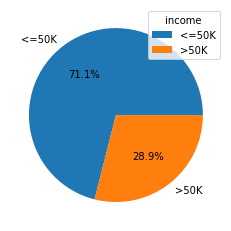

In [1124]:
plt.pie(df.income.value_counts(normalize=True), 
        labels=df.income.value_counts(normalize=True).index,
        autopct="%.1f%%",
)
plt.legend(title="income")
df.income.value_counts(normalize=True)

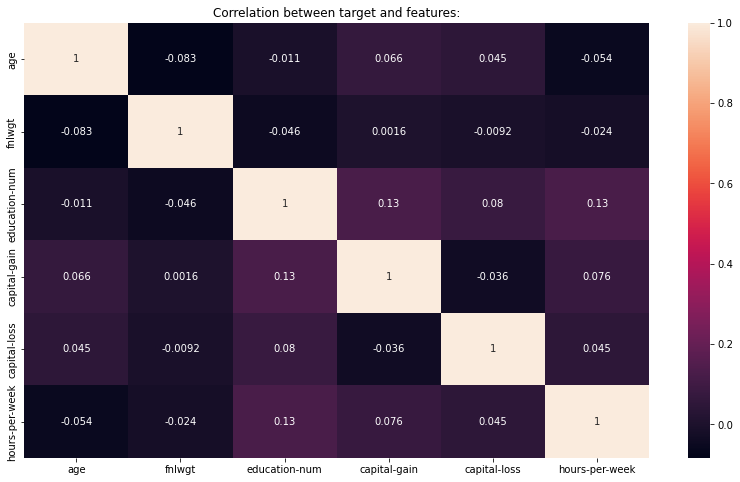

In [1125]:
plt.figure(figsize = (14, 8))
# sns.heatmap(cor, xticklabels= cor.columns, yticklabels= cor.columns, annot=True)
plt.title("Correlation between target and features:")
sns.heatmap(df.corr(), annot = True)
plt.show()

# One-Hot Encoding

If we take a look at the dataset then there are some features that are not numerical, they  are categorical. Machine Learning algorithms expect to work in numerical values. So, these categorical vaues should be transformed. <br>
<b>One-Hot Encoding</b> is one of the most popular categorical transform.

In [1126]:
features_final= pd.get_dummies(feature_minmax_transform)
income= df['income'].map({'<=50k':0,'>50k':1})
encoded= list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
encoded

105 total features after one-hot encoding.


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fi

In [1127]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married', 'Separated', 'Widowed'],
             ['not-married','married','married','married',
             'not-married','not-married','not-married'], inplace=True)

In [1128]:
for col in category_col:
    b, c= np.unique(df[col], return_inverse= True)
    df[col]= c
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,77516,9,0.800000,1,0,1,4,1,0.02174,0.0,0.397959,38,0
1,0.452055,4,83311,9,0.800000,0,3,0,4,1,0.00000,0.0,0.122449,38,0
2,0.287671,2,215646,11,0.533333,1,5,1,4,1,0.00000,0.0,0.397959,38,0
3,0.493151,2,234721,1,0.400000,0,5,0,2,1,0.00000,0.0,0.397959,38,0
4,0.150685,2,338409,9,0.800000,0,9,4,2,0,0.00000,0.0,0.397959,4,0


# Feature Selection

Having irrelevent features in data can decrease the accuracy of the models and make model learn based on the irrelevent features.<br>
So its very necessary to perform the feature selection.

In [1129]:
from scipy.stats import pointbiserialr, spearmanr

In [1130]:
col_names= df.columns
param= []
correlation= []
abs_corr= []
for c in col_names:
    if c!= "income":
        if len(df[c].unique())<=2:
            corr= spearmanr(df['income'], df[c])[0]
        else:
            corr= pointbiserialr(df['income'], df[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))
param_df= pd.DataFrame({'correlation':correlation, 'parameter':param, 'abs_corr':abs_corr})
param_df= param_df.sort_values(by=['abs_corr'], ascending= False)
param_df=param_df.set_index('parameter')
param_df

,correlation,abs_corr
parameter,,
marital-status,-0.391494,0.391494
education-num,0.337336,0.337336
sex,0.218600,0.218600
capital-gain,0.214853,0.214853
relationship,-0.200632,0.200632
hours-per-week,0.195207,0.195207
age,0.168797,0.168797
capital-loss,0.145825,0.145825
education,0.087468,0.087468


In [1131]:
best_features= param_df.index[0:8].values
print('Best features: \t', best_features)

Best features: 	 ['marital-status' 'education-num' 'sex' 'capital-gain' 'relationship'
 'hours-per-week' 'age' 'capital-loss']


If we use these features for our prediction than we can get better accuracy because other features are noise.

# Prediction

In [1132]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [1133]:
from sklearn.model_selection import train_test_split
features_final.drop(['income_<=50K','income_>50K'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(features_final, df['income'], test_size=0.3, random_state=41)

In [1143]:
features_final.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=103)

# Logistic Regression

In [1134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr_model =lr.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

print(confusion_matrix(y_test, lr_prediction))

print(classification_report(y_test, lr_prediction))

[[5339    0]
 [2178    0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5339
           1       0.00      0.00      0.00      2178

    accuracy                           0.71      7517
   macro avg       0.36      0.50      0.42      7517
weighted avg       0.50      0.71      0.59      7517



# Random Forest

In [1135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc_model =rfc.fit(X_train, y_train)
rfc_prediction = rfc_model.predict(X_test)

print(confusion_matrix(y_test, rfc_prediction))
'''
TP   FN
FP   TN
'''

print(classification_report(y_test, rfc_prediction))

[[4811  528]
 [ 791 1387]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5339
           1       0.72      0.64      0.68      2178

    accuracy                           0.82      7517
   macro avg       0.79      0.77      0.78      7517
weighted avg       0.82      0.82      0.82      7517



# Decision Tree Classifier

In [1136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = tree.DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

print(confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test, dt_prediction))

[[4497  842]
 [ 806 1372]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5339
           1       0.62      0.63      0.62      2178

    accuracy                           0.78      7517
   macro avg       0.73      0.74      0.73      7517
weighted avg       0.78      0.78      0.78      7517



# Naive Bayes

In [1137]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb_model = nb.fit(X_train, y_train)
nb_prediction = nb_model.predict(X_test)

print(confusion_matrix(y_test, nb_prediction))
print(classification_report(y_test, nb_prediction))

[[5339    0]
 [2178    0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5339
           1       0.00      0.00      0.00      2178

    accuracy                           0.71      7517
   macro avg       0.36      0.50      0.42      7517
weighted avg       0.50      0.71      0.59      7517



# K-Nearest Neighburs

In [1138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_model = knn.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

print(confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

[[4521  818]
 [1691  487]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      5339
           1       0.37      0.22      0.28      2178

    accuracy                           0.67      7517
   macro avg       0.55      0.54      0.53      7517
weighted avg       0.63      0.67      0.64      7517



# Support Vector Machine

In [1145]:
# from sklearn.svm import SVC
# svm = SVC(probability=True)

# svm_model = svm.fit(X_train, y_train)
# svm_prediction = svm_model.predict(X_test)
# print(confusion_matrix(y_test, svm_prediction))
# print(classification_report(y_test, svm_prediction))

# Accuracy Evaluation

In [1140]:
lr_accuracy = round(lr.score(X_test, y_test), 3)
rfc_accuracy = round(rfc.score(X_test, y_test), 3)
dt_accuracy = round(dt.score(X_test, y_test), 3)
nb_accuracy = round(nb.score(X_test, y_test), 3)
knn_accuracy = round(knn.score(X_test, y_test), 3)
# svm_accuracy = round(svm.score(X_test, y_test), 3)

accuracy = [lr_accuracy, rfc_accuracy, dt_accuracy, nb_accuracy, knn_accuracy] 

In [1141]:
models = ['Logistic Regression',
          'Random Forest Prediction',
          'Decision Tree',
          'Naive Bayes',
          'K-Nearest Neighbours',]

In [1142]:
accuracy_result = pd.DataFrame({'Accuracy':accuracy}, index=models)
accuracy_result = accuracy_result.sort_values(by='Accuracy')
print(accuracy_result)

                          Accuracy
K-Nearest Neighbours         0.666
Logistic Regression          0.710
Naive Bayes                  0.710
Decision Tree                0.781
Random Forest Prediction     0.825


# Conclusion

Random Forest Prediction is chosen as it has nearly the best accuracy among the models.